<a href="https://colab.research.google.com/github/netomap/flower_classification_/blob/master/Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flower Classification Tests 2**
Treinamento de modelo utilizando image augmentation

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import random

Using TensorFlow backend.


In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = keras.utils.get_file(origin=_URL, fname='flower_photos', untar=True)

data_dir = pathlib.Path(zip_file)

228818944/228813984 [==============================] - 6s 0us/step


In [4]:
class_names = np.array([item.name for item in data_dir.glob('*') if item.name != 'LICENSE.txt'])
class_names

array(['daisy', 'tulips', 'roses', 'sunflowers', 'dandelion'],
      dtype='<U10')

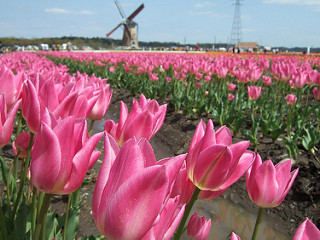

In [5]:
all_images_list = list(data_dir.glob('*/*.jpg'))
image_test = Image.open(all_images_list[random.randint(0,2000)])
image_test

**Criar o train_image_generator e validation_image_generator**

In [6]:
train_image_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    width_shift_range = .15,
    height_shift_range = 0.15,
    zoom_range = 0.3,
    horizontal_flip = True,
    validation_split = 0.1
    )

In [7]:
TARGET_SIZE = (150,150)
BATCH_SIZE = 50

train_generator = train_image_generator.flow_from_directory(
    directory = str(data_dir),
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    shuffle = True, 
    subset = 'training',
    classes = list(class_names)
)

validation_generator = train_image_generator.flow_from_directory(
    directory = str(data_dir),
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    subset = 'validation',
    classes = list(class_names)
)

STEPS_TRAIN = train_generator.n // train_generator.batch_size
STEPS_VALIDATION = validation_generator.n // validation_generator.batch_size

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


VERIFICANDO ALGUMAS IMAGENS DE TREINO GERADAS ALEATORIAMENTE EM UM DETERMINADO BATCH

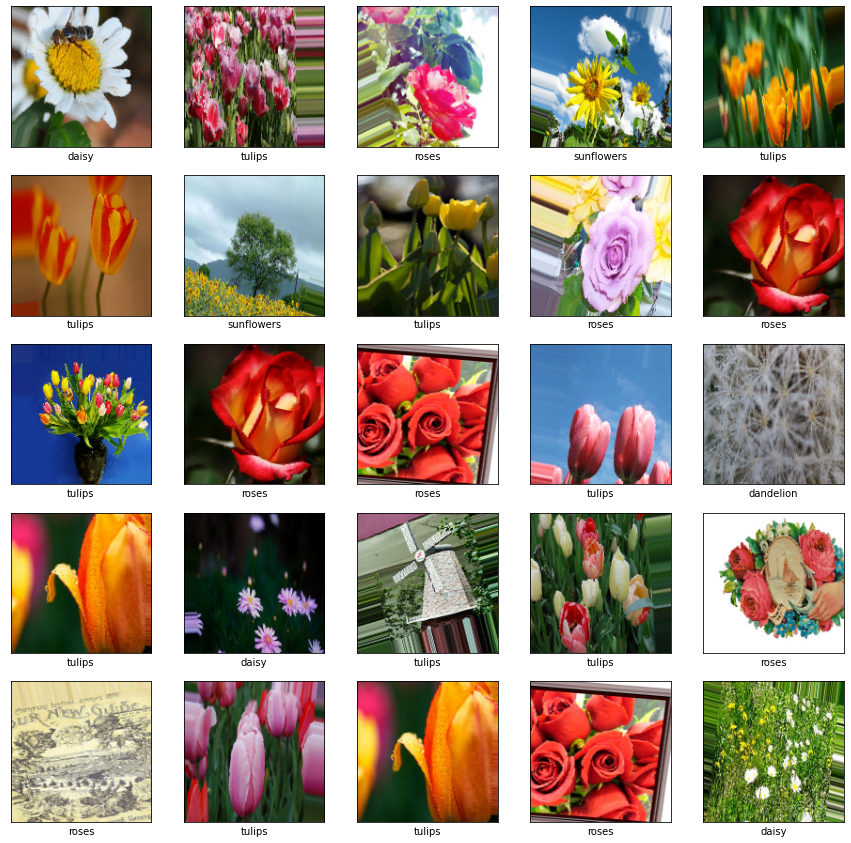

In [8]:
sample_image, sample_label = next(train_generator)
plt.figure(figsize=(15, 15))
for k in range(25):
  plt.subplot(5, 5, k+1)
  n = random.randint(0, len(sample_image)-1)
  plt.imshow(sample_image[n])
  indice = np.argmax(sample_label[n])
  plt.xlabel(class_names[indice])
  plt.xticks([])
  plt.yticks([])
plt.show()

**DEFINIÇÃO MO MODELO DA REDE NEURAL COM CONVOLUÇÃO**

In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(60, kernel_size= 3, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))
model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.Conv2D(60, kernel_size = 3, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))
model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.Conv2D(30, kernel_size = 3, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 512, activation='relu'))
model.add(keras.layers.Dense(units = 5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = STEPS_TRAIN,
    epochs = 25,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = STEPS_VALIDATION,
    shuffle = True
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
66/66 [==============================] - 31s 472ms/step - loss: 1.3097 - accuracy: 0.4238 - val_loss: 1.2077 - val_accuracy: 0.4429
Epoch 2/25
66/66 [==============================] - 31s 465ms/step - loss: 1.1275 - accuracy: 0.5166 - val_loss: 1.1353 - val_accuracy: 0.5286
Epoch 3/25
66/66 [==============================] - 31s 469ms/step - loss: 1.0292 - accuracy: 0.5725 - val_loss: 1.0407 - val_accuracy: 0.5771
Epoch 4/25
66/66 [==============================] - 31s 470ms/step - loss: 0.9693 - accuracy: 0.6182 - val_loss: 1.0258 - val_accuracy: 0.5829
Epoch 5/25
66/66 [==============================] - 31s 468ms/step - loss: 0.9022 - accuracy: 0.6459 - val_loss: 1.0357 - val_accuracy: 0.6029
Epoch 6/25
66/66 [==============================] - 31s 469ms/step - loss: 0.8320 - accuracy: 0.6776 - val_loss: 1.0930 - val_accuracy: 0.5857
Epoch 7/25
66/66 [==============================] - 31s 470ms/step

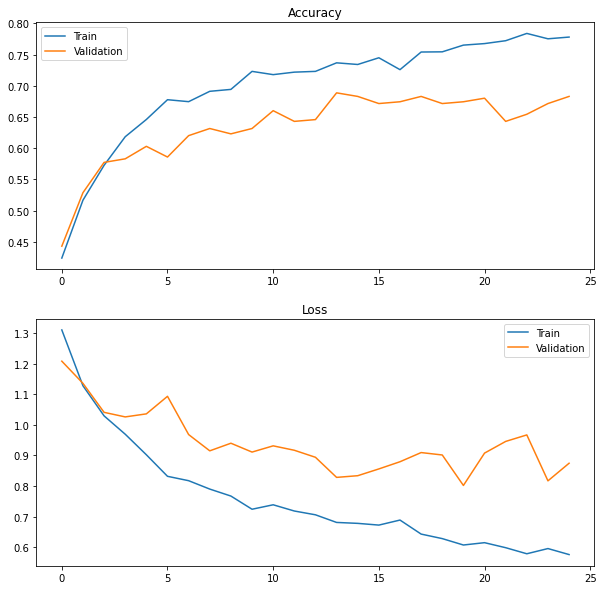

In [20]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(range(25), train_acc, label='Train')
plt.plot(range(25), val_acc, label='Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(2,1,2)
plt.plot(range(25), train_loss, label='Train')
plt.plot(range(25), val_loss, label='Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1680      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  32460     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  1

In [22]:
model.save('/content/drive/My Drive/Colab Notebooks/flower_classifications/Teste2/modelo1.h5')